In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv(f"nypd.csv", encoding="utf8")
df.columns

Index(['INCIDENT_KEY', 'OCCUR_DATE', 'OCCUR_TIME', 'BORO', 'LOC_OF_OCCUR_DESC',
       'PRECINCT', 'JURISDICTION_CODE', 'LOC_CLASSFCTN_DESC', 'LOCATION_DESC',
       'STATISTICAL_MURDER_FLAG', 'PERP_AGE_GROUP', 'PERP_SEX', 'PERP_RACE',
       'VIC_AGE_GROUP', 'VIC_SEX', 'VIC_RACE', 'X_COORD_CD', 'Y_COORD_CD',
       'Latitude', 'Longitude', 'New Georeferenced Column',
       'Borough Boundaries', 'City Council Districts', 'Police Precincts',
       'Zip Codes', 'Community Districts'],
      dtype='object')

In [7]:
# plot as a bar chart with number of INCIDENTs by boro

In [17]:
incidents_by_boro = df.groupby("BORO")["INCIDENT_KEY"].count()
incidents_by_boro

BORO
BRONX            535
BROOKLYN         568
MANHATTAN        307
QUEENS           266
STATEN ISLAND     40
Name: INCIDENT_KEY, dtype: int64

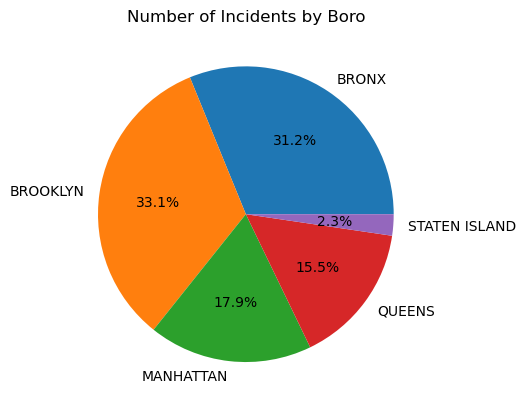

In [25]:
plt.pie(x = incidents_by_boro.values, labels = incidents_by_boro.index, autopct = "%1.1f%%")
plt.title("Number of Incidents by Boro")
plt.show()

In [27]:
# plot as a bar chart with number of INCIDENTs by boro that ended badly as "Y"

In [43]:
# answer

y_by_boro = df[df["STATISTICAL_MURDER_FLAG"] == "Y"].value_counts("BORO")

In [ ]:
smf_by_b = df.groupby

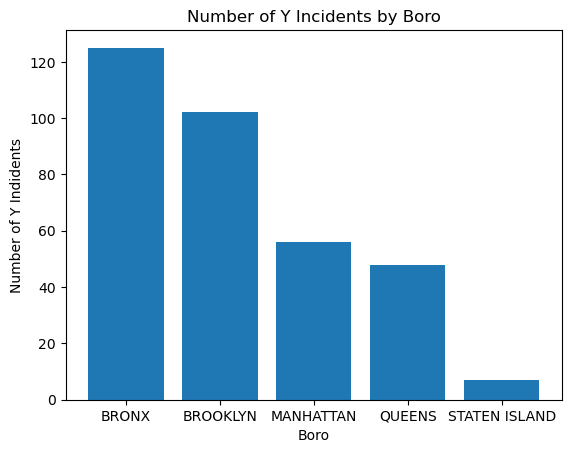

In [61]:
plt.bar(y_by_boro.index, y_by_boro.values)
plt.title("Number of Y Incidents by Boro")
plt.xlabel("Boro")
plt.ylabel("Number of Y Indidents")
plt.show()

<Axes: xlabel='BORO'>

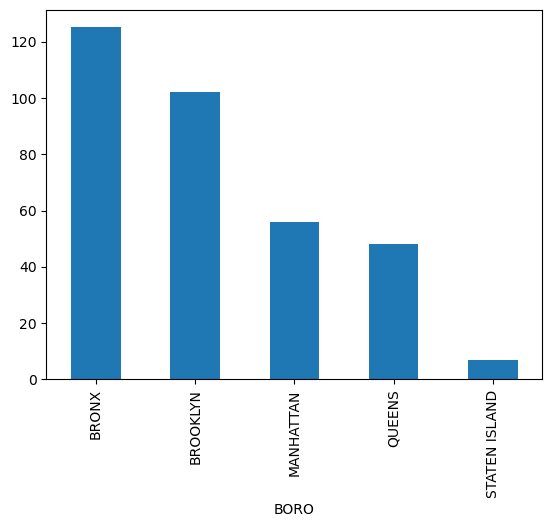

In [75]:
smf_b = df.groupby(["STATISTICAL_MURDER_FLAG", "BORO"])["INCIDENT_KEY"].count()
smf_b_plot = smf_b["Y"].plot.bar()
smf_b_plot

In [77]:
df.columns

Index(['INCIDENT_KEY', 'OCCUR_DATE', 'OCCUR_TIME', 'BORO', 'LOC_OF_OCCUR_DESC',
       'PRECINCT', 'JURISDICTION_CODE', 'LOC_CLASSFCTN_DESC', 'LOCATION_DESC',
       'STATISTICAL_MURDER_FLAG', 'PERP_AGE_GROUP', 'PERP_SEX', 'PERP_RACE',
       'VIC_AGE_GROUP', 'VIC_SEX', 'VIC_RACE', 'X_COORD_CD', 'Y_COORD_CD',
       'Latitude', 'Longitude', 'New Georeferenced Column',
       'Borough Boundaries', 'City Council Districts', 'Police Precincts',
       'Zip Codes', 'Community Districts'],
      dtype='object')

Text(0.5, 1.0, 'Incidents by New York City')

<Figure size 2000x1000 with 0 Axes>

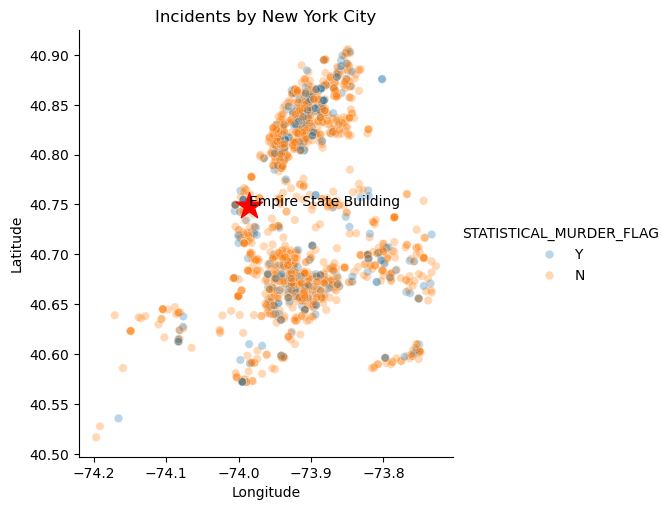

In [163]:
plt.figure(figsize=(20,10))
# plt.scatter(df["Longitude"], df["Latitude"], alpha=0.3)
sns.relplot(x="Longitude", y="Latitude", hue="STATISTICAL_MURDER_FLAG", alpha=.3, data=df)

plt.scatter(-73.9857, 40.7484, marker="*", s=400, c="red")
plt.annotate("Empire State Building", (-73.9857, 40.7484))
plt.title("Incidents by New York City")

In [113]:
df.columns

Index(['INCIDENT_KEY', 'OCCUR_DATE', 'OCCUR_TIME', 'BORO', 'LOC_OF_OCCUR_DESC',
       'PRECINCT', 'JURISDICTION_CODE', 'LOC_CLASSFCTN_DESC', 'LOCATION_DESC',
       'STATISTICAL_MURDER_FLAG', 'PERP_AGE_GROUP', 'PERP_SEX', 'PERP_RACE',
       'VIC_AGE_GROUP', 'VIC_SEX', 'VIC_RACE', 'X_COORD_CD', 'Y_COORD_CD',
       'Latitude', 'Longitude', 'New Georeferenced Column',
       'Borough Boundaries', 'City Council Districts', 'Police Precincts',
       'Zip Codes', 'Community Districts'],
      dtype='object')

In [135]:
# answer

df["OCCUR_TIME"].str.split(":").apply(lambda x : int(x[0]))

0       22
1        4
2        0
3       19
4        1
        ..
1711     3
1712    13
1713     3
1714    20
1715    18
Name: OCCUR_TIME, Length: 1716, dtype: int64

<Axes: xlabel='OCCUR_HOUR'>

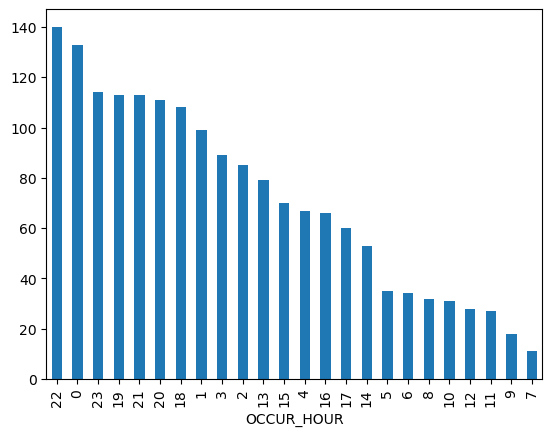

In [149]:
# solution

df["OCCUR_TIME"] = pd.to_datetime(df["OCCUR_TIME"], format="%H:%M:%S")
df["OCCUR_HOUR"] = df["OCCUR_TIME"].dt.hour
df["OCCUR_HOUR"].value_counts().plot.bar()